<a href="https://colab.research.google.com/github/reyfaaa/latihan2/blob/main/GMM_Latihan_2_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latihan 2 Komputasi Statistika
Kelompok 4
> 1. Rifa Nayaka Utami - 2106632163
2. Nasywa Safira Ardanty - 2106704074
3. Nurkhalisha Humaira- 2106703802
4. Aristriana Muhamad - 2106709043
5. Wulan Akhsah - 2106637100


**Gaussian Mixture Model**

Gaussian Mixture Models (GMM) efektif untuk representasi densitas multimodel. Pada eksperimen ini Parameter GMM diestimasi dengan menggunakan algoritma Expectation Maximization (EM) yang hasilnya ditampilkan untuk dataset yang diberikan pada link berikut: https://archive.ics.uci.edu/ml/datasets/iris

Pertanyaan:

A. Cobalah lakukan pengelompokan pada data 2d:
a. PetalLenght vs Petal witdh
b. SepalLenght vs Sepal width

 dan lihat apakah dapat menghasilkan cluster yang sebenarnya? (bayangkan kita tidak memiliki label spesies pada data ini dan ingin membagi bunga menjadi beberapa spesies)

Anda boleh memodifikasi jumlah cluster yang berubah-ubah dengan pendekatan berikut:
1. Pendekatan K-Means Clustering
2. Pendekatan GMM 
3. Pendekatan GMM menggunakan EM

B. Prediksi cluster untuk setiap titik data untuk pendekatan K-Means Clustering dan GMM pada ke dua data 2D di atas. Analisalah hasil perbandingan dari K-Means Clustering dan GMM Clustering.



Model campuran Gaussian dengan struktur kovarians yang berbeda:
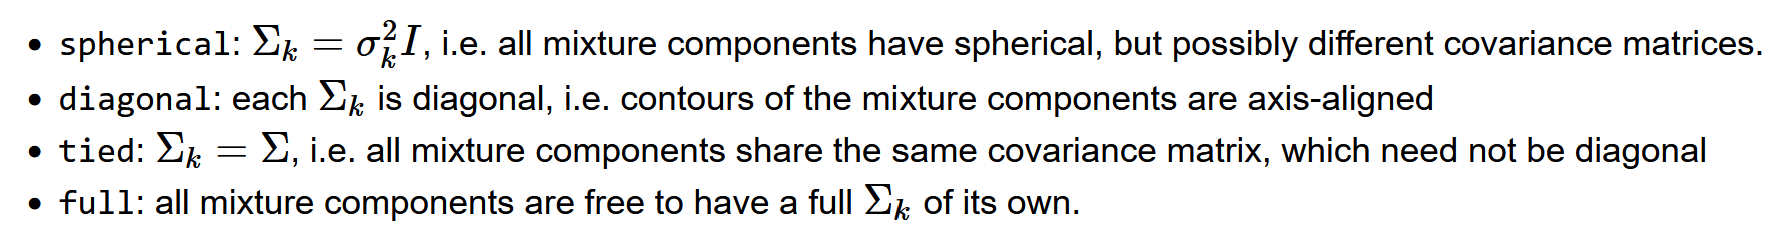

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
import sklearn.datasets
from sklearn import datasets
data,target = datasets.load_iris(return_X_y=True)

iris = datasets.load_iris()

In [ ]:
url = 'https://raw.githubusercontent.com/gianiarda/latihan2/main/Iris.csv'
data = pd.read_csv(url)

In [ ]:
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
136,137,6.3,3.4,5.6,2.4,Iris-virginica
132,133,6.4,2.8,5.6,2.2,Iris-virginica
25,26,5.0,3.0,1.6,0.2,Iris-setosa
101,102,5.8,2.7,5.1,1.9,Iris-virginica
65,66,6.7,3.1,4.4,1.4,Iris-versicolor


In [ ]:
# membagi data menjadi features (X) dan labels (y)
X = data.iloc[:,1:5]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
66             5.6           3.0            4.5           1.5
11             4.8           3.4            1.6           0.2
79             5.7           2.6            3.5           1.0
48             5.3           3.7            1.5           0.2
118            7.7           2.6            6.9           2.3
71     Iris-versicolor
136     Iris-virginica
5          Iris-setosa
106     Iris-virginica
75     Iris-versicolor
Name: Species, dtype: object


In [ ]:
# untuk melihat beberapa sampel yang dimiliki pada setiap spesies
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

##a. Petal length vs Petal witdh

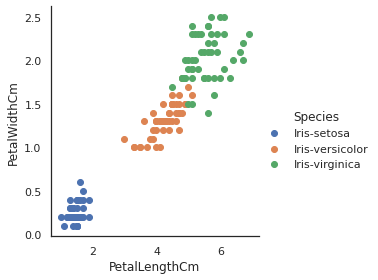

In [ ]:
# menggunakan seaborn untuk membuat scatter plot yang menunjukkan spesies untuk setiap sampel
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

In [ ]:
X_scaled1 = data.iloc[:,[3,4]].values

In [ ]:
#K-Means Clustering
from sklearn.cluster import KMeans
from sklearn import preprocessing

nclusters = 3 # nilai k pada kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled1)

# memprediksi cluster untuk setiap titik data 
y_cluster_kmeans1 = km.predict(X_scaled1)
y_cluster_kmeans1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn import metrics
score1 = metrics.silhouette_score(X_scaled1, y_cluster_kmeans1)
score1

0.6602760882193361

In [ ]:
nclusters2 = 5 # nilai k pada kmeans
seed = 0

km = KMeans(n_clusters=nclusters2, random_state=seed)
km.fit(X_scaled1)

# mempresiksi cluster untuk setiap titik data 
y_cluster_kmeans2 = km.predict(X_scaled1)
y_cluster_kmeans2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 4, 2, 4, 4, 2, 1, 2, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 4, 4, 2, 1, 4, 2, 1, 1, 4, 4, 2, 2,
       4, 1, 4, 2, 4, 4, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
score2 = metrics.silhouette_score(X_scaled1, y_cluster_kmeans2)
score2

0.5881403468025436

Berdasarkan hasil skor yang didapatkan dengan pendekatan K-Means clustering, skor yang didapatkan saat nclusters = 3 lebih mendekati 1 yaitu sebesar 0.6602760882193361, dibandingkan skor yang didapatkan saat nclusters = 5 sebesar 0.5881403468025436. Maka, K-Means clustering dengan ncluster = 3 lebih baik dibandingkan nclusters = 5. Hal ini menunjukkan bahwa data lebih efektif jika dibagi menjadi 3 cluster/bagian daripada jika dibagi menjadi 5 cluster.

In [ ]:
#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']

from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width dan height berbentuk "full" widths, bukan radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip


In [ ]:
from sklearn.mixture import GaussianMixture
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(X_scaled1) ## fits mixture model menggunakan EM

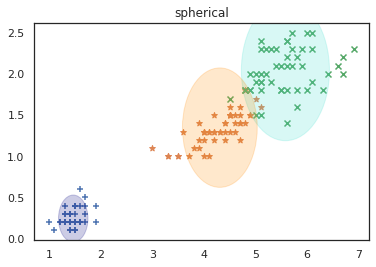

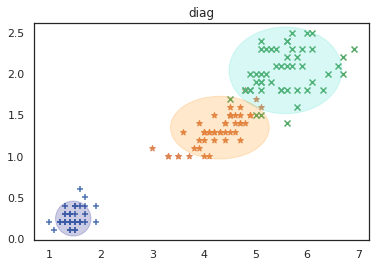

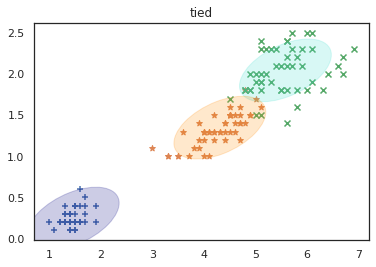

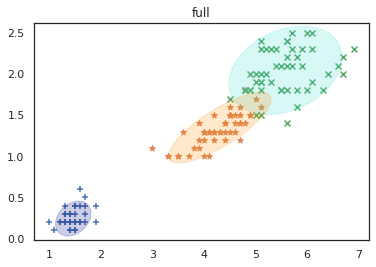

In [ ]:
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled1)

# memprediksi cluster untuk setiap titik data 
y_cluster_gmm1 = gmm.predict(X_scaled1)
y_cluster_gmm1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
scoregmm1 = adjusted_rand_score(y, y_cluster_gmm1)
scoregmm1

0.9221767019765943

In [ ]:
gmm = GaussianMixture(n_components=nclusters2)
gmm.fit(X_scaled1)

# memprediksi cluster untuk setiap titik data 
y_cluster_gmm2 = gmm.predict(X_scaled1)
y_cluster_gmm2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 3, 3, 0, 2, 0, 3, 3,
       2, 3, 3, 2, 3, 3, 3, 0, 0, 4, 3, 2, 0, 2, 3, 3, 2, 2, 3, 3, 3, 0,
       3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2])

In [ ]:
scoregmm2 = adjusted_rand_score(y, y_cluster_gmm2)
scoregmm2

0.7110200701693217

Berdasarkan hasil skor yang didapatkan dengan pendekatan GMM menggunakan EM, skor yang didapatkan saat nclusters = 3 lebih mendekati 1 yaitu sebesar 0.9221767019765943, dibandingkan skor yang didapatkan saat nclusters = 5 sebesar 0.7110200701693217. Maka, dengan pendekatan GMM menggunakan EM dengan ncluster = 3 lebih baik dibandingkan nclusters = 5. Hal ini menunjukkan bahwa data lebih efektif jika dibagi menjadi 3 cluster/bagian daripada jika dibagi menjadi 5 cluster.

Pada hasil di atas kita tahu bahwa pendekatan K-means terbaik yang dicoba adalah menggunakan 3 cluster dan pendekatan GMM menggunakan EM terbaik yang dicoba adalah menggunakan 3 cluster. Skor yang didapatkan dengan pendekatan K-Means clustering dengan 3 cluster adalah 0.6602760882193361, sedangkan dengan pendekatan GMM menggunakan EM  dengan 3 cluster adalah 0.9221767019765943. Maka, pada kasus ini, clustering lebih baik menggunakan **pendekatan GMM menggunakan EM  dengan 3 cluster**.

## b. Sepal length vs Sepal width

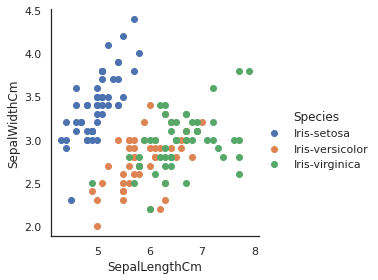

In [ ]:
# melakukan hal yang sama pada sepals
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

In [ ]:
X_scaled2 = data.iloc[:,[1,2]].values

In [ ]:
#K-Means Clustering
nclusters = 3 # nilai k pada kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled2)

# memprediksi cluster untuk setiap titik data 
y_cluster_kmeans3 = km.predict(X_scaled2)
y_cluster_kmeans3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
score3 = metrics.silhouette_score(X_scaled2, y_cluster_kmeans3)
score3

0.4434693231245126

In [ ]:
nclusters2 = 5 # nilai k pada kmeans
seed = 0

km = KMeans(n_clusters=nclusters2, random_state=seed)
km.fit(X_scaled2)

# memprediksi cluster untuk setiap titik data 
y_cluster_kmeans4 = km.predict(X_scaled2)
y_cluster_kmeans4

array([4, 1, 1, 1, 4, 4, 1, 4, 1, 1, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 1, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 1, 4, 4, 1, 1, 4,
       4, 1, 4, 1, 4, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 3, 0, 0, 3, 1, 3, 0, 3,
       0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 0, 2, 3, 0, 0, 3, 2, 2, 0, 3, 3, 3,
       0, 0, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
score4 = metrics.silhouette_score(X_scaled2, y_cluster_kmeans4)
score4

0.413803300514678

Berdasarkan hasil skor yang didapatkan dengan pendekatan K-Means clustering, skor yang didapatkan saat nclusters = 3 lebih mendekati 1 yaitu sebesar 0.4434693231245126, dibandingkan skor yang didapatkan saat nclusters = 5 sebesar 0.413803300514678. Maka, K-Means clustering dengan ncluster = 3 lebih baik dibandingkan nclusters = 5. Hal ini menunjukkan bahwa data lebih efektif jika dibagi menjadi 3 cluster/bagian daripada jika dibagi menjadi 5 cluster.

In [ ]:
from sklearn.cluster import KMeans

nclusters = 3 # nilai k pada kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled2)

# memprediksi cluster untuk setiap titik data 
y_cluster_kmeans3 = km.predict(X_scaled2)
y_cluster_kmeans3

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans3)
score

0.45035009681032034

In [ ]:
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(X_scaled2) ## fits mixture model menggunakan EM

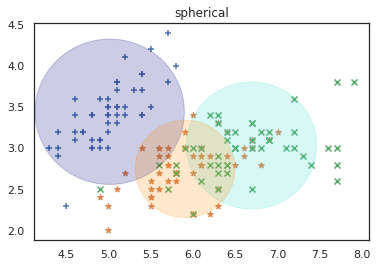

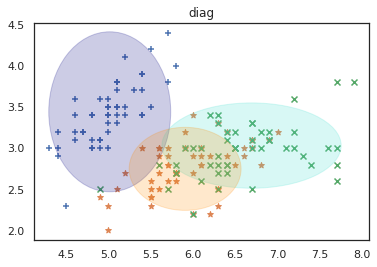

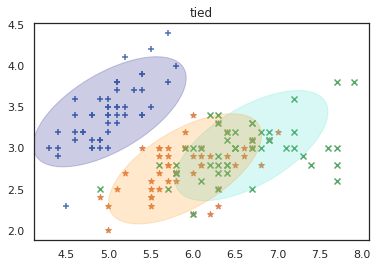

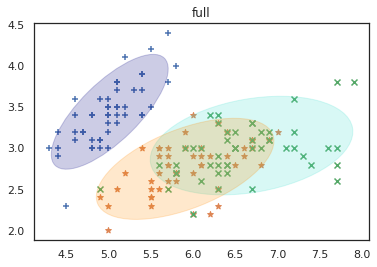

In [ ]:
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()

In [ ]:
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled2)

# memprediksi cluster untuk setiap titik data 
y_cluster_gmm3 = gmm.predict(X_scaled2)
y_cluster_gmm3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
scoregmm3 = adjusted_rand_score(y, y_cluster_gmm3)
scoregmm3

0.5473439141421311

In [ ]:
gmm = GaussianMixture(n_components=nclusters2)
gmm.fit(X_scaled2)

# memprediksi cluster untuk setiap titik data 
y_cluster_gmm4 = gmm.predict(X_scaled2)
y_cluster_gmm4

array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 4, 0, 3,
       3, 0, 3, 0, 3, 0, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1,
       1, 4, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 4,
       1, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 1, 1, 2, 4, 1, 4, 1,
       1, 4, 1, 4, 4, 1, 1, 2, 2, 4, 1, 4, 2, 4, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1])

In [ ]:
scoregmm4 = adjusted_rand_score(y, y_cluster_gmm4)
scoregmm4

0.3576093749774473

Berdasarkan hasil skor yang didapatkan dengan pendekatan GMM menggunakan EM, skor yang didapatkan saat nclusters = 3 lebih mendekati 1 yaitu sebesar 0.5473439141421311, dibandingkan skor yang didapatkan saat nclusters = 5 sebesar 0.3576093749774473. Maka, dengan pendekatan GMM menggunakan EM dengan ncluster = 3 lebih baik dibandingkan nclusters = 5. Hal ini menunjukkan bahwa data lebih efektif jika dibagi menjadi 3 cluster/bagian daripada jika dibagi menjadi 5 cluster.

Pada hasil di atas kita tahu bahwa pendekatan K-means terbaik yang dicoba adalah menggunakan 3 cluster dan pendekatan GMM menggunakan EM terbaik yang dicoba adalah menggunakan 3 cluster. Skor yang didapatkan dengan pendekatan K-Means clustering dengan 3 cluster adalah 0.4434693231245126, sedangkan dengan pendekatan GMM menggunakan EM  dengan 3 cluster adalah 0.5473439141421311. Maka, pada kasus ini, clustering lebih baik menggunakan **pendekatan GMM menggunakan EM  dengan 3 cluster**.

**Maka, dapat disimpulkan bahwa clustering pada data, keduanya, tersebut lebih baik menggunakan pendekatan GMM menggunakan EM dengan 3 cluster yang merupakan *distribution-based model*.**